<a href="https://colab.research.google.com/github/park21306/DataProject/blob/main/Tesla_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [9]:
import plotly.io as pio
pio.renderers.default='colab'

In [11]:
url = "https://raw.githubusercontent.com/park21306/DataSet/main/TSLA.csv"

In [12]:
df = pd.read_csv(url)

In [13]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,414.739109,425.323268,402.764717,415.137952,415.137952,6.178552e+07
std,234.908560,239.374833,229.101662,234.987820,234.987820,3.306128e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,194.901001,199.384003,188.566994,193.368995,193.368995,3.628290e+07
50%,408.951996,418.700012,401.660004,408.500000,408.500000,5.561600e+07
75%,606.549988,627.795013,586.750000,607.234985,607.234985,8.131825e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


In [16]:
px.area(df , x = "Date" , y = "Close")

In [17]:
px.line(df , x = "Date" , y = "Close")

In [20]:
px.area(df , x = "Date" , y = "Volume")

In [21]:
px.bar(df , y = "Volume")

In [22]:
px.box(df , y = "Close")

In [23]:
columns = ['Date' , 'Close']
ndf = pd.DataFrame(df , columns = columns)

In [24]:
ndf

,Date,Close
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


In [27]:
prophet_df = ndf.rename(columns = {'Date':'ds' , 'Close':'y'})

In [28]:
prophet_df

,ds,y
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


In [29]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc250fn10/8ivl7nw_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc250fn10/g8lfx9ln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49897', 'data', 'file=/tmp/tmpc250fn10/8ivl7nw_.json', 'init=/tmp/tmpc250fn10/g8lfx9ln.json', 'output', 'file=/tmp/tmpc250fn10/prophet_modelgpmus0z3/prophet_model-20230802051214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [32]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,65.599460,-21.074299,149.412563,65.599460,65.599460,-5.864685,-5.864685,-5.864685,-5.864685,-5.864685,-5.864685,0.0,0.0,0.0,59.734775
1,2020-03-17,67.394950,-23.217013,149.107481,67.394950,67.394950,-2.383380,-2.383380,-2.383380,-2.383380,-2.383380,-2.383380,0.0,0.0,0.0,65.011571
2,2020-03-18,69.190441,-18.308235,149.444966,69.190441,69.190441,-3.494360,-3.494360,-3.494360,-3.494360,-3.494360,-3.494360,0.0,0.0,0.0,65.696081
3,2020-03-19,70.985932,-21.691332,152.839112,70.985932,70.985932,-3.843579,-3.843579,-3.843579,-3.843579,-3.843579,-3.843579,0.0,0.0,0.0,67.142353
4,2020-03-20,72.781423,-26.073328,147.353322,72.781423,72.781423,-7.762547,-7.762547,-7.762547,-7.762547,-7.762547,-7.762547,0.0,0.0,0.0,65.018876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-04-07,900.291503,808.907757,980.079817,899.040505,901.344862,-3.494360,-3.494360,-3.494360,-3.494360,-3.494360,-3.494360,0.0,0.0,0.0,896.797143
277,2021-04-08,902.748588,815.837692,983.317592,901.430066,903.880340,-3.843579,-3.843579,-3.843579,-3.843579,-3.843579,-3.843579,0.0,0.0,0.0,898.905009
278,2021-04-09,905.205673,807.446933,972.636435,903.810780,906.450352,-7.762547,-7.762547,-7.762547,-7.762547,-7.762547,-7.762547,0.0,0.0,0.0,897.443127
279,2021-04-10,907.662758,833.775937,1003.746619,906.215752,908.971232,11.674274,11.674274,11.674274,11.674274,11.674274,11.674274,0.0,0.0,0.0,919.337033


In [33]:
px.line(forecast , x = 'ds' , y = 'yhat')

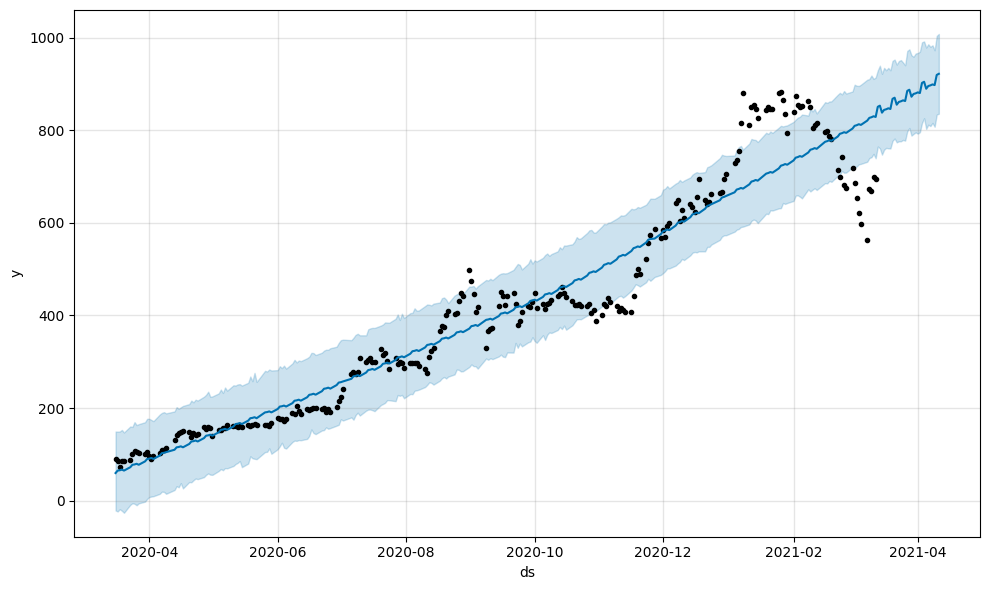

In [34]:
figure = m.plot(forecast , xlabel = 'ds' , ylabel = 'y')

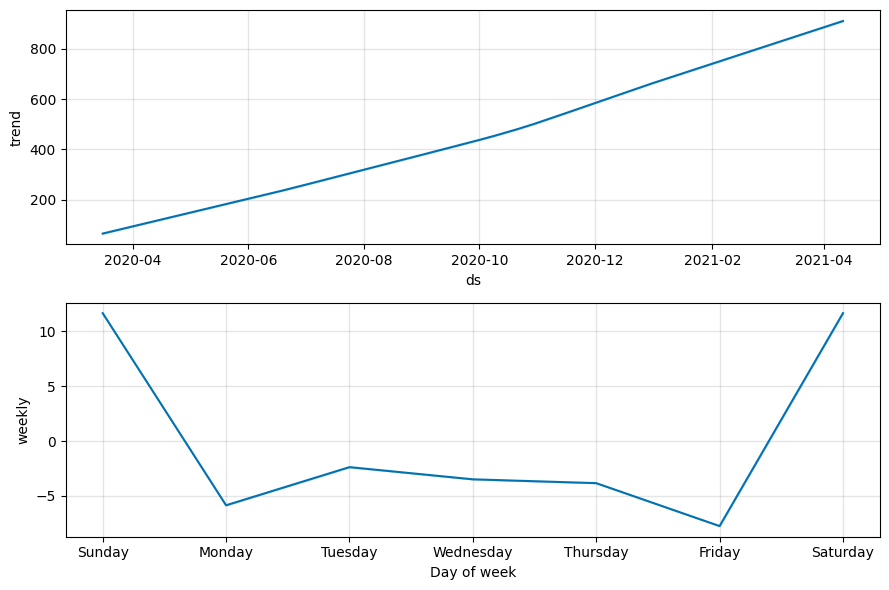

In [36]:
figure2 = m.plot_components(forecast)

In [37]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>